In [1]:
#########################################
## Advection mode and methods
#########################################
"""
    Tutorial to define advection options
    Mode: backward or forward
    Methods: Runga-kutta 1 (RK4 flat)
             Runga-kutta 4  (RK1 flat)
    
    Mode is either controlled by time variable (increasing=forward,
    decreasing=backward) or by argument mode = "backward" or "forward"
    when initializing particles (ParticleSet)
    
    Methods are defined as functions in Diagnostics.py. New methods
    can be implemented directly in Diagnostics.py.
    
    Two examples are provided using different fields and particles
    setting.
"""
# import librairies
import sys
sys.path.append('..')
from lamta.Diagnostics import ParticleSet, Lagrangian
from testFields import peninsula
from lamta.Load_nc import loadCMEMSuv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap #mapping toolbox

In [2]:
##### 1) Peninsula case with parcels initialized from inputs

# load field
field = peninsula()
# if particles are set "from_input" forward and backward advections can be
# set using increasing or decreasing time values (pt) 
ptf = np.array([0,200]) #forward
ptb = np.array([200,0]) #backward
px = np.array([200,200,200,200])
py = np.array([15,35,55,75])
numstep = 30
psetf = ParticleSet.from_input(ptf,px,py,fieldset=field) #forward
psetb = ParticleSet.from_input(ptb,px,py,fieldset=field) #backward

# Trajectories with RK1 method
trjff = psetf.rk1flat(Lagrangian.interpf,numstep)
trjfb = psetb.rk1flat(Lagrangian.interpf,numstep)

/Users/louise/Documents/LOUISE/LAMTA/lamtaLR/Example/testFields.py:22: RuntimeWarning: invalid value encountered in scalar divide
  psi[i,j] = (u0*R**2*y[j]/((x[i]-x0)**2 + y[j]**2)) - u0*y[j]


ValueError: The points in dimension 0 must be strictly ascending or descending

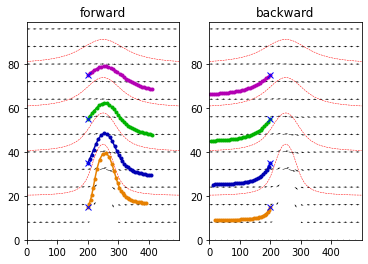

In [5]:
# Plot trajectories
xf,yf = np.asarray(trjff['trjx']),np.asarray(trjff['trjy'])
xb,yb = np.asarray(trjfb['trjx']),np.asarray(trjfb['trjy'])
col = [[0.9,0.5,0],[0,0,0.7],[0,0.7,0],[0.7,0,0.7]]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.contour(field['lon'],field['lat'],field['psi'],levels=np.arange(-80,0,20),colors='red',linewidths=0.5)
ax1.quiver(field['lon'][0:500:20,0:100:8],field['lat'][0:500:20,0:100:8],field['u'][0:500:20,0:100:8],
           field['v'][0:500:20,0:100:8],scale=40)
for i in range(4):
    ax1.plot(xf[:,i],yf[:,i],color=col[i])
    ax1.plot(xf[:,i],yf[:,i],'.',color=col[i])
ax1.plot(trjff['trjx'][0],trjff['trjy'][0],'bx') #initial positions
ax1.set_title('forward')
ax2.contour(field['lon'],field['lat'],field['psi'],levels=np.arange(-80,0,20),colors='red',linewidths=0.5)
ax2.quiver(field['lon'][0:500:20,0:100:8],field['lat'][0:500:20,0:100:8],field['u'][0:500:20,0:100:8],
           field['v'][0:500:20,0:100:8],scale=40)
for i in range(4):
    ax2.plot(xb[:,i],yb[:,i],color=col[i])
    ax2.plot(xb[:,i],yb[:,i],'.',color=col[i])
ax2.plot(trjfb['trjx'][0],trjfb['trjy'][0],'bx') #initial positions
ax2.set_title('backward')
plt.show()

In [7]:
##### 1) Ocean case with parcels initialized from grid

# load field
all_days = ['20220919','20220920','20220921','20220922','20220923','20220924','20220925','20220926','20220927','20220928','20220929']
rep = 'data/'
varn = {'longitude':'longitude','latitude':'latitude','u':'ugos','v':'vgos'}
field = loadCMEMSuv(all_days,rep,varn,unit='deg/d')

# Particle set from grid
numdays = 10
loni = [5,7]
lati = [41,43]
delta0 = 0.5
dayvb = '2022-09-29' #starting backward advection from 2022-09-29
dayvf = '2022-09-19' #starting forward advection from 2022-09-19
numstep = 20
#if "mode" argument is not defined, default is backward
psetb = ParticleSet.from_grid(numdays,loni,lati,delta0,dayvb,fieldset=field,mode='backward')
psetf = ParticleSet.from_grid(numdays,loni,lati,delta0,dayvf,fieldset=field,mode='forward')

# Trajectories RK4 with u,v from ocean field
trjfb = psetb.rk4flat(Lagrangian.interpf,numstep,coordinates='spherical')
trjff = psetf.rk4flat(Lagrangian.interpf,numstep,coordinates='spherical')

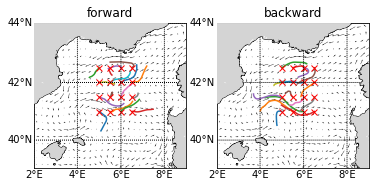

In [8]:
# Plot trajectories
[Y,X] = np.meshgrid(field['lat'],field['lon'])
u0 = field['u'][0,:,:]
v0 = field['v'][0,:,:]

fig = plt.figure()
ax = fig.add_subplot(121)
ax.set_title('forward')
mymap=Basemap(projection='merc',llcrnrlat=39,urcrnrlat=44,llcrnrlon=2,urcrnrlon=9,resolution='h')
X,Y = mymap(X,Y)
mymap.quiver(X,Y,u0,v0,scale=5)
x,y = mymap(np.array(trjff['trjx']),np.array(trjff['trjy']))
mymap.plot(x,y)
mymap.plot(x[0],y[0],'rx') #initial positions
mymap.fillcontinents(color='0.83',zorder=100)
mymap.drawcoastlines()
mymap.drawparallels(np.arange(-90,90+1,2),labels=[1,0,0,0],fontsize=10)
mymap.drawmeridians(np.arange(-180,180+1,2),labels=[0,0,0,1],fontsize=10)

ax = fig.add_subplot(122)
ax.set_title('backward')
mymap.quiver(X,Y,u0,v0,scale=5)
x,y = mymap(np.array(trjfb['trjx']),np.array(trjfb['trjy']))
mymap.plot(x,y)
mymap.plot(x[0],y[0],'rx') #initial positions
mymap.fillcontinents(color='0.83',zorder=100)
mymap.drawcoastlines()
mymap.drawparallels(np.arange(-90,90+1,2),labels=[1,0,0,0],fontsize=10)
mymap.drawmeridians(np.arange(-180,180+1,2),labels=[0,0,0,1],fontsize=10)

plt.show()